In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
import xgboost as xgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [2]:
"""
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'z_Subaru_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST', 'Mass_median', 'Mass_l68', 'Mass_u68',
        'z_rcs_flux_corr', 'z_hsc_flux_corr', 'i_hsc_flux_corr',
       'i_rcs_flux_corr', 'i_flux_corr', 'y_hsc_flux_corr', 'r_flux_corr',
       'r_hsc_flux_corr', 'r_rcs_flux_corr', 'ch1_swire_flux_corr',
       'ch2_swire_flux_corr', 'ch3_swire_flux_corr', 'ch4_swire_flux_corr',
       'ch1_servs_flux_corr', 'ch2_servs_flux_corr', 'g_flux_corr',
       'g_hsc_flux_corr', 'nb921_hsc_flux_corr', 'g_rcs_flux_corr'
]
"""
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'z_Subaru_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST', 
        'z_rcs_flux_corr', 'z_hsc_flux_corr', 'i_hsc_flux_corr',
       'i_rcs_flux_corr', 'i_flux_corr', 'y_hsc_flux_corr', 'r_flux_corr',
       'r_hsc_flux_corr', 'r_rcs_flux_corr', 'ch1_swire_flux_corr',
       'ch2_swire_flux_corr', 'ch3_swire_flux_corr', 'ch4_swire_flux_corr',
       'ch1_servs_flux_corr', 'ch2_servs_flux_corr', 'g_flux_corr',
       'g_hsc_flux_corr', 'nb921_hsc_flux_corr', 'g_rcs_flux_corr'
]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [3]:
data = pd.read_csv("../../../Data/Fangyou_data/Cleaned/combined_filled_preprocessed.csv")

In [4]:
data.columns

Index(['Source_Name', 'Total_flux', 'Peak_flux', 'S_Code', 'EBV',
       'FUV_flux_corr', 'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr',
       'R_flux_corr', 'I_flux_corr', 'z_flux_corr', 'z_Subaru_flux_corr',
       'y_flux_corr', 'J_flux_corr', 'H_flux_corr', 'K_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',
       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',
       'F_SPIRE_350', 'F_SPIRE_500', 'Z_BEST', 'Mass_median', 'Mass_l68',
       'Mass_u68', 'Source', 'AGN_final', 'RadioAGN_final', 'Classification',
       'Radio_excess', 'AGNfrac_af', 'AGNfrac_af_16', 'AGNfrac_cg_s_16',
       'Xray', 'Opt_spec', 'IRAGN', 'Extended_radio', 'z_rcs_flux_corr',
       'z_hsc_flux_corr', 'i_hsc_flux_corr', 'i_rcs_flux_corr', 'i_flux_corr',
       'y_hsc_flux_corr', 'r_flux_corr', 'r_hsc_flux_corr', 'r_rcs_flux_corr',
       'ch1_swire_flux_corr', 'ch2_swire_flux_corr', 'ch3_swire_flux_corr',
       'ch4_swire_flux_corr', 'ch1_

In [5]:
data.isna().sum()

Source_Name            0
Total_flux             0
Peak_flux              0
S_Code                 0
EBV                    0
                      ..
ch2_servs_flux_corr    0
g_flux_corr            0
g_hsc_flux_corr        0
nb921_hsc_flux_corr    0
g_rcs_flux_corr        0
Length: 63, dtype: int64

In [244]:
X = data[features_num]
y = data[np.append(y_column, ['Xray', 'Opt_spec', 'Extended_radio', 'IRAGN'])]
print(len(X))

77609


In [245]:
# Selectin only certain Z
z_min = 2.5
z_max = 5
#filt_z = ((X['Z_BEST']>z_min) & ((X['Z_BEST']<z_max)))
filt_z = (X['Z_BEST']>z_min)
                                 
X = X[filt_z]
y = y[filt_z]   
print(len(X))

10184


In [246]:
0.15*0.1

0.015

In [247]:
le = LabelEncoder()
labels = np.unique(y[y_column].astype(str))
y[y_column] = le.fit_transform(y[y_column])

In [248]:
# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

y_train_flags = y_train[['Xray', 'Opt_spec', 'Extended_radio', 'IRAGN']]
y_test_flags = y_test[['Xray', 'Opt_spec', 'Extended_radio', 'IRAGN']]

y_train = y_train.drop(columns=['Xray', 'Opt_spec', 'Extended_radio', 'IRAGN'])
y_test = y_test.drop(columns=['Xray', 'Opt_spec', 'Extended_radio', 'IRAGN'])

In [249]:
def one_hot(df, columns):
    """
    One-hot encoding a certain column in a dataframe
    """
    one_hot = pd.get_dummies(df[columns])
    df = df.drop(columns=columns, axis = 1)
    df = df.join(one_hot)
    return df

In [250]:
# Standard scaling the numerical data
scaler = MinMaxScaler()

# Transforming the categorical data
X_train[features_num] = scaler.fit_transform(X_train[features_num])
X_test[features_num] = scaler.transform(X_test[features_num])

In [251]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

# Lightgbm

In [252]:
import lightgbm as lgb
lightbm = lgb.LGBMClassifier(num_class=4, 
                             objective="multiclass",  
                             n_estimators=10000, 
                             class_weight="balanced",
                            early_stopping_round=50,
                            eta=0.3,
                            #verbose=-1,
                            max_depth=9,
                            num_leaves=150
                            #min_data_in_leaf=0
                            )

In [253]:
2**8

256

In [254]:
lightbm.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], sample_weight=classes_weights)

C:\Users\jespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's multi_logloss: 0.57688	valid_0's multi_logloss: 2.0927
[2]	training's multi_logloss: 0.482983	valid_0's multi_logloss: 1.82563
[3]	training's multi_logloss: 0.417327	valid_0's multi_logloss: 1.65386
[4]	training's multi_logloss: 0.364949	valid_0's multi_logloss: 1.51766
[5]	training's multi_logloss: 0.322369	valid_0's multi_logloss: 1.41422
[6]	training's multi_logloss: 0.28765	valid_0's multi_logloss: 1.32836
[7]	training's multi_logloss: 0.258658	valid_0's multi_logloss: 1.25946
[8]	training's multi_logloss: 0.233242	valid_0's multi_logloss: 1.197
[9]	training's multi_logloss: 0.211178	valid_0's multi_logloss: 1.14732
[10]	training's multi_logloss: 0.192492	valid_0's multi_logloss: 1.10457
[11]	training's multi_logloss: 0.175009	valid_0's multi_logloss: 1.06197
[12]	training's multi_logloss: 0.160081	valid_0's multi_logloss: 1.02563
[13]	training's multi_logloss: 0.146611	valid_0's multi_logloss: 0.99449
[14]	training's multi_logloss: 0.135067	valid_0's multi_logloss: 

[111]	training's multi_logloss: 0.00386997	valid_0's multi_logloss: 0.563015
[112]	training's multi_logloss: 0.00381829	valid_0's multi_logloss: 0.563361
[113]	training's multi_logloss: 0.00374238	valid_0's multi_logloss: 0.563877
[114]	training's multi_logloss: 0.0036668	valid_0's multi_logloss: 0.564344
[115]	training's multi_logloss: 0.00355407	valid_0's multi_logloss: 0.564153
[116]	training's multi_logloss: 0.00348663	valid_0's multi_logloss: 0.56442
[117]	training's multi_logloss: 0.00338708	valid_0's multi_logloss: 0.563976
[118]	training's multi_logloss: 0.0032446	valid_0's multi_logloss: 0.564405
[119]	training's multi_logloss: 0.00314966	valid_0's multi_logloss: 0.563928
[120]	training's multi_logloss: 0.00305882	valid_0's multi_logloss: 0.564596
[121]	training's multi_logloss: 0.00296865	valid_0's multi_logloss: 0.565551
[122]	training's multi_logloss: 0.00292727	valid_0's multi_logloss: 0.566065
[123]	training's multi_logloss: 0.00284593	valid_0's multi_logloss: 0.566688
[1

LGBMClassifier(class_weight='balanced', early_stopping_round=50, eta=0.3,
               max_depth=9, n_estimators=10000, num_class=4, num_leaves=150,
               objective='multiclass')

In [231]:
cv_score_lgb = cross_val_score(lightbm, X_train, y_train, cv=32, n_jobs=-1, scoring="accuracy")

In [232]:
print("Cross-validated Accuracy:", round(np.mean(cv_score_lgb), 5), "±", round(np.std(cv_score_lgb), 5))

Cross-validated Accuracy: 0.87436 ± 0.01571


In [151]:
y_pred = lightbm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.7189    0.8165    0.7646       545
quasar-like radio AGN / high-excitation radio galaxy     0.4945    0.5000    0.4972        90
                                     radio-quiet AGN     0.6818    0.8320    0.7495       631
                                 star-forming galaxy     0.9057    0.8117    0.8561      2060

                                            accuracy                         0.8079      3326
                                           macro avg     0.7002    0.7400    0.7169      3326
                                        weighted avg     0.8215    0.8079    0.8112      3326



[]

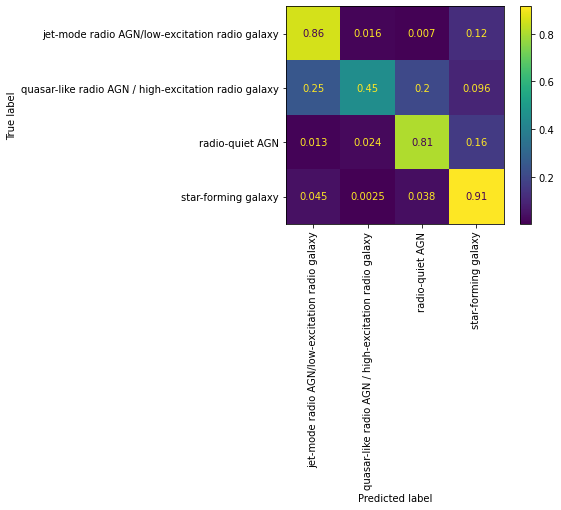

In [160]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

In [174]:
y_pred_xgb = model.predict(X_test)
y_pred_lgb = lightbm.predict(X_test)

In [175]:
y_pred_temp = y_pred_xgb.copy()
y_pred_temp[y_pred_temp==0] = 0
y_pred_temp[y_pred_lgb==0] = 0

In [176]:
print(classification_report(y_test, y_pred_temp, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.7663    0.8842    0.8210      2581
quasar-like radio AGN / high-excitation radio galaxy     0.5628    0.4148    0.4776       270
                                     radio-quiet AGN     0.7199    0.7942    0.7553      1356
                                 star-forming galaxy     0.9537    0.9144    0.9337     11315

                                            accuracy                         0.8902     15522
                                           macro avg     0.7507    0.7519    0.7469     15522
                                        weighted avg     0.8953    0.8902    0.8914     15522



# XGBoost

In [237]:
model = XGBClassifier(use_label_encoder=False, 
                      max_depth=8, 
                      reg_alpha=2, 
                      min_child_weight=2, 
                      #reg_lambda=3,
                      eta=0.3, # Remember to reduce to 0.1 or 0.05 for better results
                      tree_method='hist', # exact is more precies, but this is much faster
                      objective='multi:softprob',
                      n_estimators=8000,
                      )

In [238]:
bst = model.fit(X_train, y_train, 
                eval_set=[(X_train, y_train), (X_test, y_test)], 
                early_stopping_rounds=50,
                verbose=True, 
                sample_weight=classes_weights
               ) # Maybe remove weight

C:\Users\jespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.09230	validation_1-mlogloss:1.11085
[1]	validation_0-mlogloss:0.91588	validation_1-mlogloss:0.94764
[2]	validation_0-mlogloss:0.79543	validation_1-mlogloss:0.83877
[3]	validation_0-mlogloss:0.70814	validation_1-mlogloss:0.76333
[4]	validation_0-mlogloss:0.63962	validation_1-mlogloss:0.70428
[5]	validation_0-mlogloss:0.58696	validation_1-mlogloss:0.65978
[6]	validation_0-mlogloss:0.54595	validation_1-mlogloss:0.62607
[7]	validation_0-mlogloss:0.51290	validation_1-mlogloss:0.59901
[8]	validation_0-mlogloss:0.48387	validation_1-mlogloss:0.57698
[9]	validation_0-mlogloss:0.45734	validation_1-mlogloss:0.55655
[10]	validation_0-mlogloss:0.43605	validation_1-mlogloss:0.54168
[11]	validation_0-mlogloss:0.41605	validation_1-mlogloss:0.52795
[12]	validation_0-mlogloss:0.39907	validation_1-mlogloss:0.51707
[13]	validation_0-mlogloss:0.38419	validation_1-mlogloss:0.50706
[14]	validation_0-mlogloss:0.37075	validation_1-mlogloss:0.49834
[15]	validation_0-mlogloss:0.35829	

[126]	validation_0-mlogloss:0.05640	validation_1-mlogloss:0.37560
[127]	validation_0-mlogloss:0.05590	validation_1-mlogloss:0.37561
[128]	validation_0-mlogloss:0.05538	validation_1-mlogloss:0.37572
[129]	validation_0-mlogloss:0.05505	validation_1-mlogloss:0.37577
[130]	validation_0-mlogloss:0.05458	validation_1-mlogloss:0.37577
[131]	validation_0-mlogloss:0.05430	validation_1-mlogloss:0.37592
[132]	validation_0-mlogloss:0.05384	validation_1-mlogloss:0.37599
[133]	validation_0-mlogloss:0.05354	validation_1-mlogloss:0.37617
[134]	validation_0-mlogloss:0.05309	validation_1-mlogloss:0.37588
[135]	validation_0-mlogloss:0.05260	validation_1-mlogloss:0.37584
[136]	validation_0-mlogloss:0.05229	validation_1-mlogloss:0.37594
[137]	validation_0-mlogloss:0.05194	validation_1-mlogloss:0.37646
[138]	validation_0-mlogloss:0.05150	validation_1-mlogloss:0.37627
[139]	validation_0-mlogloss:0.05121	validation_1-mlogloss:0.37636
[140]	validation_0-mlogloss:0.05094	validation_1-mlogloss:0.37649
[141]	vali

In [239]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.7814    0.8325    0.8061       949
quasar-like radio AGN / high-excitation radio galaxy     0.5229    0.4831    0.5022       118
                                     radio-quiet AGN     0.7088    0.8026    0.7528       831
                                 star-forming galaxy     0.9190    0.8776    0.8978      3619

                                            accuracy                         0.8501      5517
                                           macro avg     0.7330    0.7489    0.7397      5517
                                        weighted avg     0.8552    0.8501    0.8517      5517



[]

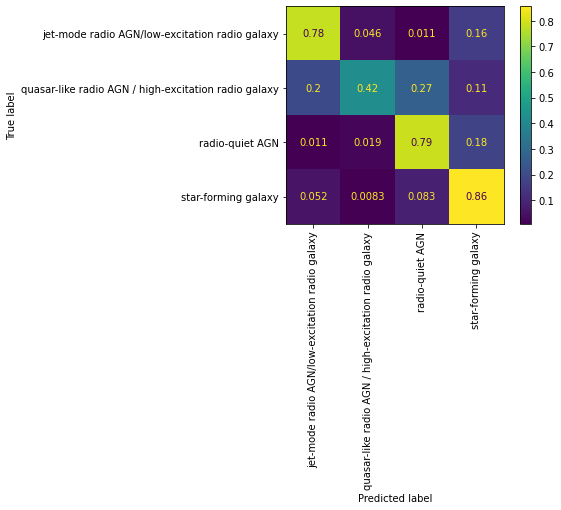

In [228]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

## Feature relevance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

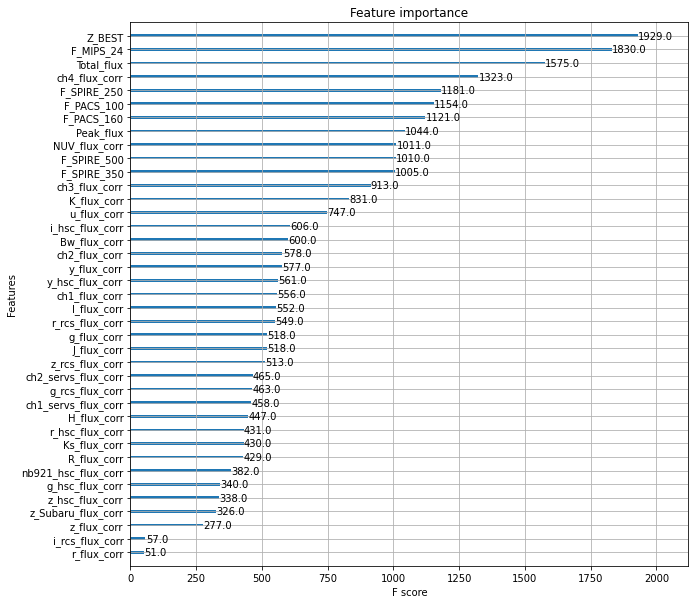

In [224]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, ax=ax)

# DNN

In [108]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[1],)
        ),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(4),
    ]
)

In [109]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="Adam",
    metrics=["accuracy"],
)

In [113]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True,
)

In [114]:
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=1000,
    callbacks=[early_stopping],
    validation_data=(X_test, y_test),
)

Epoch 1/1000
148/148 [==============================] - 4s 12ms/step - loss: 1.0948 - accuracy: 0.5036 - val_loss: 1.0311 - val_accuracy: 0.5469
Epoch 2/1000
148/148 [==============================] - 1s 7ms/step - loss: 1.0355 - accuracy: 0.5292 - val_loss: 1.0039 - val_accuracy: 0.5528
Epoch 3/1000
148/148 [==============================] - 1s 7ms/step - loss: 1.0075 - accuracy: 0.5472 - val_loss: 0.9774 - val_accuracy: 0.5689
Epoch 4/1000
148/148 [==============================] - 1s 9ms/step - loss: 0.9728 - accuracy: 0.5673 - val_loss: 0.9595 - val_accuracy: 0.5647
Epoch 5/1000
148/148 [==============================] - 1s 8ms/step - loss: 0.9508 - accuracy: 0.5787 - val_loss: 0.9499 - val_accuracy: 0.5740
Epoch 6/1000
148/148 [==============================] - 1s 8ms/step - loss: 0.9516 - accuracy: 0.5658 - val_loss: 0.9316 - val_accuracy: 0.5833
Epoch 7/1000
148/148 [==============================] - 1s 7ms/step - loss: 0.9228 - accuracy: 0.5838 - val_loss: 0.9336 - val_accuracy

148/148 [==============================] - 1s 5ms/step - loss: 0.8149 - accuracy: 0.6377 - val_loss: 0.9120 - val_accuracy: 0.6128
Epoch 58/1000
148/148 [==============================] - 1s 5ms/step - loss: 0.8152 - accuracy: 0.6400 - val_loss: 0.8819 - val_accuracy: 0.6213
